# Hello again!

In [3]:
import numpy as np, matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

# OTHER QISKIT IMPORTS

from qiskit import *
from qiskit.visualization import *
from qiskit_ibm_runtime import *
from qiskit_aer import *

# DRAW STYLE (default mpl dark), check https://quantum.cloud.ibm.com/docs/en/guides/visualize-circuits and 
# https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.visualization.circuit_drawer for more styles

def draw_circuit(qc):
    return qc.draw(output = 'mpl', style = 'iqp-dark')

We've done the basics, but you might be feeling a bit overwhelmed by the sheer number of gates and colors in the circuit diagrams. Don't worry, it's normal! Let's break down very carefully each gate and its function, starting from the single-qubit state gates.

Without getting into platitudes about superposition and entanglement, let's just say that quantum gates are the building blocks of quantum circuits, similar to classical logic gates in traditional computing. They manipulate qubits, changing their states and enabling complex quantum operations. 

# Basics of Quantum Gates:

As explained before, quantum gates are unitary operators that act on qubits, changing their states in a **reversible** manner. They can be represented mathematically as matrices of size $2^n\times 2^n$, for $n$ qubits the gate acts upon. The set of all such gates forms a group under matrix multiplication, specifically the unitary group $\mathrm{U}(2^n)$. Here we only consider $n=1$.

A single qubit is a $2\times 1$ complex vector, and a single-qubit gate is a $2\times 2$ unitary matrix. The action of a gate $U$ on a qubit state $\ket{\psi}$ along with its reverse operation is given by:
$$\ket{\psi'} = U\ket{\psi}, \quad \ket{\psi} = U^\dagger\ket{\psi'}$$
where $U^\dagger$ is the conjugate transpose of $U$.

> **Note:**  
> The addition of qubits to a particular quantum system is represented by the *Kronecker tensor product* of their respective state vectors. For instance, if we have two qubits in states $\ket{\psi_1}$ and $\ket{\psi_2}$, the combined state of the system is given by:  
> $$\ket{\psi} = \ket{\psi_1} \otimes \ket{\psi_2}$$
> The statespace is then spanned by $4\times 1$ vectors belonging to a Hilbert space $\mathcal{H}_4$, and the gates acting on this now two-qubit system are represented by $4\times 4$ unitary matrices.  
>
> In strictly mathematical terms, if $A$ and $B$ represent two linear transformations, then their tensor product $A \otimes B$ is defined by:  
> $$(A \otimes B)(\ket{i} \otimes \ket{j}) = A\ket{i} \otimes B\ket{j}$$

The simplest single-qubit gates is the identity gate `I`, which leaves the qubit state unchanged. Its matrix representation is:
$$I = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$$

# The Pauli Gates:

The *Pauli Gates* correspond to the triplet of Pauli matrices $\{\sigma_x, \sigma_y, \sigma_z\}$, which are the basis of the Lie algebra associated with the Lie group $\mathrm{SU}(2)$, representing the group of special unitary transformations in a two-dimensional complex vector space. They can either represent physically, polarization states of photons, or spin states of electrons. 

The connection between quantum mechanics and the mathematical framework of Lie groups lies in the association of mapping qubits to **photons** undergoing polarization, which can be represented as rotations on the Bloch sphere. The Pauli matrices serve as generators of these rotations, allowing us to manipulate qubit states through unitary transformations like rotation, bit and phase flips.

$$\sigma_x = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}, \quad \sigma_y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}, \quad \sigma_z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}

In Qiskit, these gates (abbreviated as `X`, `Y`, and `Z`) perform a rotation around the $x$, $y$ and $z$-axes of the Bloch sphere by $\pi$ radians of the qubit state, respectively. Since this explanation is already quite dense, I'll just show you their effects on the basis states $\ket{0}$ and $\ket{1}$, and maybe you can try to verify your results using matrix multiplication yourself!

- The `X` gate (also known as the NOT gate) flips the state of a qubit:
    - $X\ket{0} = \ket{1}$
    - $X\ket{1} = \ket{0}$

- The `Y` gate performs a bit and phase flip:
    - $Y\ket{0} = i\ket{1}$
    - $Y\ket{1} = -i\ket{0}$

- The `Z` gate flips the phase of the qubit:
    - $Z\ket{0} = \ket{0}$
    - $Z\ket{1} = -\ket{1}$

Now, try them out in Qiskit and see how they affect the qubit states! Replace x with other gates, and also try to reverse the operations using the same gates again to prove unitarity. Go nuts!

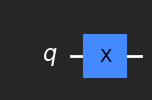

In [9]:
qc_x = QuantumCircuit(1)
qc_x.x(0)

draw_circuit(qc_x)

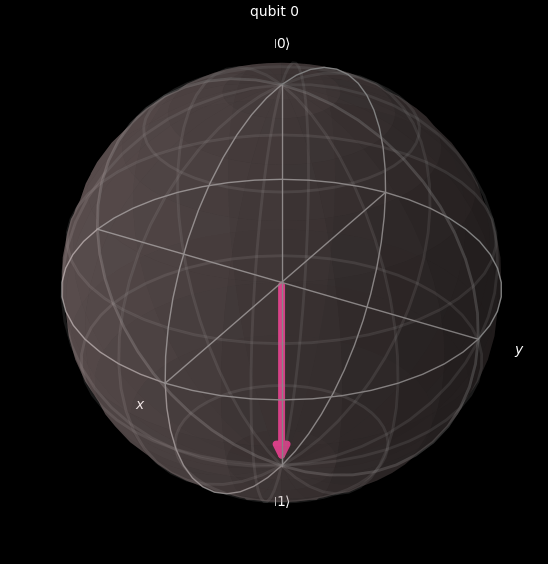

In [10]:
plot_bloch_multivector(qc_x)

# Phase Gates:

The *Phase Gates* is a family of single-qubit gates that map the basis states $\ket{0}$ and $\ket{1}$ to themselves, but introduce a relative phase shift $\varphi$ between them. The most common phase gates are the `S` and `T` gates, which correspond to phase shifts of $\frac{\pi}{2}$ and $\frac{\pi}{4}$ radians, respectively:

$$P(\varphi) = \begin{pmatrix} 1 & 0 \\ 0 & e^{i\varphi} \end{pmatrix} \quad S = \begin{pmatrix} 1 & 0 \\ 0 & i \end{pmatrix}, \quad T = \begin{pmatrix} 1 & 0 \\ 0 & e^{i\pi/4} \end{pmatrix}$$

Notice how the case $\varphi = \pi$ corresponds to the `Z` gate, which is also a phase gate!

For the uninitiated, phase shifts might seem a bit abstract, but they are crucial in quantum computing as they allow for the manipulation of qubit states in a way that is not possible with classical bits. Phase gates are essential for creating interference patterns in quantum algorithms, which can lead to speedups in certain computations. Also, $e^{i\varphi}$ is Euler's formula, which relates complex exponentials to a rotation by a certain angle $\varphi$ in the complex plane.

Now, notice something strange and quirky, try doing $S^2$ and $T^4$ in your notebook as well as here, and see what you get.

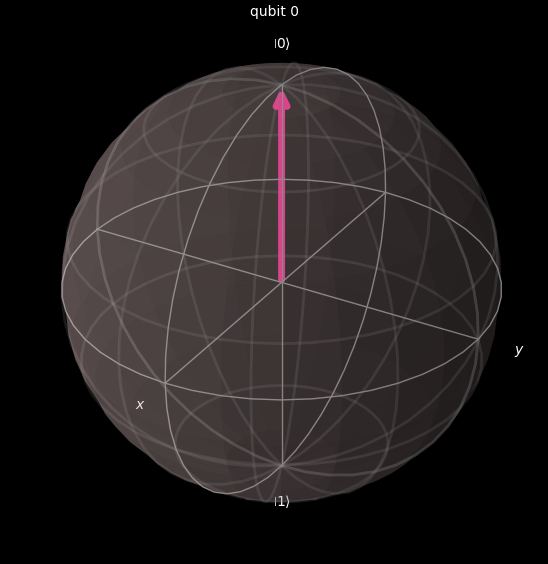

In [12]:
qc1 = QuantumCircuit(1)
qc1.s(0)
qc1.s(0)

qc2 = QuantumCircuit(1)
qc2.t(0)
qc2.t(0)
qc2.t(0)
qc2.t(0)

qc3 = QuantumCircuit(1)
qc3.z(0)

plot_bloch_multivector(qc1) #, qc2, qc3)

Remember, the $Z$ gate does not affect the $\ket{0}$ state! Can you write S and T in terms of Z? Why is that? Is that due to the power rule of exponents?

# The Generalized Rotation Gates:

You noticed these in the last notebook, but I didn't touch upon them. The rotation gates `Rx`, `Ry`, and `Rz` perform rotations around the $x$, $y$, and $z$ axes of the Bloch sphere by an arbitrary angle $\theta$. Their matrix representations are given by:

$$R_x(\theta) = \begin{pmatrix} \cos\theta/2 & -i\sin\theta/2 \\ -i\sin\theta/2 & \cos\theta/2 \end{pmatrix}, \quad R_y(\theta) = \begin{pmatrix} \cos\theta/2 & -\sin\theta/2 \\ \sin\theta/2 & \cos\theta/2 \end{pmatrix}, \quad R_z(\theta) = \begin{pmatrix} e^{-i\theta/2} & 0 \\ 0 & e^{i\theta/2} \end{pmatrix}$$

These are the analog of the rotation matrices in classical mechanics, if we map $\mathrm{SO}(3)$ to $\mathrm{SU}(2)$, or the Bloch sphere to rectangular coordinates. The rotation gates are particularly useful for creating arbitrary qubit states and implementing quantum algorithms that require precise control over qubit states, like in optimization protocols.

Written as generators, we get in terms of the Pauli matrices:
$$R_x(\theta) = e^{-i\theta X/2}, \quad R_y(\theta) = e^{-i\theta Y/2}, \quad R_z(\theta) = e^{-i\theta Z/2}$$

You might've also noticed $\sqrt{X}$ and $\sqrt{Y}$ gates in the previous notebook. These are just special cases of the rotation gates, where $\theta = \pi/2$. The $X$ gate is also known as the *square root of NOT* gate, because applying it twice is equivalent to applying the $X$ gate once. For example, remember you derived $S=\sqrt(Z)$.

# The Hadamard Gate:

The centerpiece of single-qubit gates is the *Hadamard Gate* `H`, which creates **equal superposition** states from the basis states and vice versa. Its matrix representation is: 

$$H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$$

The Hadamard gate transforms the basis states as follows:
$$H\ket{0} = \frac{1}{\sqrt{2}}(\ket{0} + \ket{1}) = \ket{+}, \quad H\ket{1} = \frac{1}{\sqrt{2}}(\ket{0} - \ket{1}) = \ket{-}$$

Try it with $\ket{0}$ and $\ket{1}$ states in your notebook, and see how it creates superposition states. Then come back, and see the Bloch sphere representation of these states. $\ket{1}$ can be obtained by applying the `X` gate to $\ket{0}$, and then applying the `H` gate to $\ket{1}$ gives you $\ket{-}$.

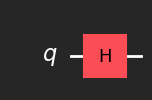

In [ ]:
qc = QuantumCircuit(1)
#qc.x(0)
qc.h(0)

draw_circuit(qc)

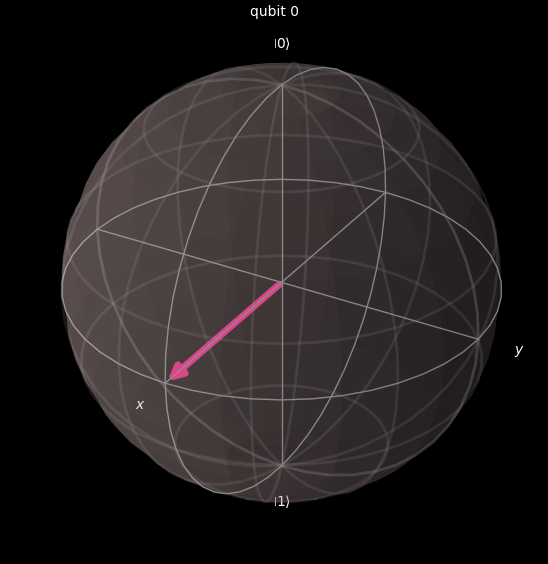

In [14]:
plot_bloch_multivector(qc)

The $\ket{\pm}$ states are one of the *diagonal basis* of the qubit state space, and are actually eigenstates of the `X` gate, with eigenvalues $\pm 1$. This means that if you apply the `X` gate to $\ket{+}$, you get $\ket{+}$ back, and if you apply it to $\ket{-}$, you get $-\ket{-}$ back. This property is useful in various quantum algorithms and protocols.

The other of the diagonal basis is the *circular basis* $\ket{\pm i}$, defined as:
$$\ket{\pm i} = \frac{1}{\sqrt{2}}(\ket{0} \pm i\ket{1})$$
and sure enough, these are the eigenstates of the `Y` gate, with eigenvalues $\pm 1$.

The computational basis $\{\ket{0}, \ket{1}\}$, the diagonal basis $\{\ket{+}, \ket{-}\}$, and the circular basis $\{\ket{+i}, \ket{-i}\}$ are all mutually unbiased bases (MUBs) in the two-dimensional complex vector space. This means that if a qubit is prepared in a state from one basis, and then measured in another basis, the outcomes are completely random and uniformly distributed.

There is a generalized Hadamard gate for $n$ qubits, but we won't go into that here. That's reserved for notebooks I'll write further down the line.

# ----------------------------------------- *** ------------------------------------------ 

That's it for now! In the next notebook, we'll explore multi-qubit gates and how they enable entanglement and more complex quantum operations. See you there!